 CountVectorizer means breaking down a sentence or any text into words by performing preprocessing tasks like converting all words to lowercase, thus removing special characters.

It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

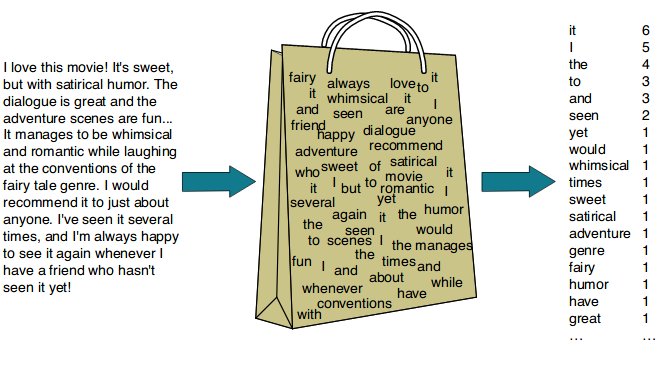

In [1]:
import nltk
nltk.download('punkt')   #Another way to download

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91799\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
import nltk
# nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91799\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
paragraph =  """I have three visions for India. In 3000 years of our history, people from all over 
               the world have come and invaded us, captured our lands, conquered our minds. 
               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,
               the French, the Dutch, all of them came and looted us, took over what was ours. 
               Yet we have not done this to any other nation. We have not conquered anyone. 
               We have not grabbed their land, their culture, 
               their history and tried to enforce our way of life on them. 
               Why? Because we respect the freedom of others.That is why my 
               first vision is that of freedom. I believe that India got its first vision of 
               this in 1857, when we started the War of Independence. It is this freedom that
               we must protect and nurture and build on. If we are not free, no one will respect us.
               My second vision for India’s development. For fifty years we have been a developing nation.
               It is time we see ourselves as a developed nation. We are among the top 5 nations of the world
               in terms of GDP. We have a 10 percent growth rate in most areas. Our poverty levels are falling.
               Our achievements are being globally recognised today. Yet we lack the self-confidence to
               see ourselves as a developed nation, self-reliant and self-assured. Isn’t this incorrect?
               I have a third vision. India must stand up to the world. Because I believe that unless India 
               stands up to the world, no one will respect us. Only strength respects strength. We must be 
               strong not only as a military power but also as an economic power. Both must go hand-in-hand. 
               My good fortune was to have worked with three great minds. Dr. Vikram Sarabhai of the Dept. of 
               space, Professor Satish Dhawan, who succeeded him and Dr. Brahm Prakash, father of nuclear material.
               I was lucky to have worked with all three of them closely and consider this the great opportunity of my life. 
               I see four milestones in my career"""

In [4]:
#cleaning the texts

import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
ps=PorterStemmer()
wordnet=WordNetLemmatizer()
sentences=nltk.sent_tokenize(paragraph)
sentences
len(sentences)

31

In [5]:
corpus=[]
for i in range(len(sentences)):
    review=re.sub('[^a-zA-Z]',' ',sentences[i])
    print(review)
    #replace characters other than [a-z] and (A-Z) with spaces
    review=review.lower()#convert to lowercase
    review=review.split()# split using space(list of words)
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    #check whether stop word  or not
    review=' '.join(review)# join the preprocessed words
    corpus.append(review)# append the content
print(corpus)#print  the preprocessed content

['three vision india', 'year histori peopl world come invad us captur land conquer mind', 'alexand onward greek turk mogul portugues british french dutch came loot us took', 'yet done nation', 'conquer anyon', 'grab land cultur histori tri enforc way life', '', 'respect freedom other first vision freedom', 'believ india got first vision start war independ', 'freedom must protect nurtur build', 'free one respect us', 'second vision india develop', 'fifti year develop nation', 'time see develop nation', 'among top nation world term gdp', 'percent growth rate area', 'poverti level fall', 'achiev global recognis today', 'yet lack self confid see develop nation self reliant self assur', 'incorrect', 'third vision', 'india must stand world', 'believ unless india stand world one respect us', 'strength respect strength', 'must strong militari power also econom power', 'must go hand hand', 'good fortun work three great mind', 'dr vikram sarabhai dept', 'space professor satish dhawan succeed dr 

In [6]:
#creating the bag of words model(into vectors)
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(corpus).toarray()
print(X)
X.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(31, 113)

In [7]:
cv.get_feature_names_out()

C:\Users\91799\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['achiev',
 'alexand',
 'also',
 'among',
 'anyon',
 'area',
 'assur',
 'believ',
 'brahm',
 'british',
 'build',
 'came',
 'captur',
 'career',
 'close',
 'come',
 'confid',
 'conquer',
 'consid',
 'cultur',
 'dept',
 'develop',
 'dhawan',
 'done',
 'dr',
 'dutch',
 'econom',
 'enforc',
 'fall',
 'father',
 'fifti',
 'first',
 'fortun',
 'four',
 'free',
 'freedom',
 'french',
 'gdp',
 'global',
 'go',
 'good',
 'got',
 'grab',
 'great',
 'greek',
 'growth',
 'hand',
 'histori',
 'incorrect',
 'independ',
 'india',
 'invad',
 'lack',
 'land',
 'level',
 'life',
 'loot',
 'lucki',
 'materi',
 'mileston',
 'militari',
 'mind',
 'mogul',
 'must',
 'nation',
 'nuclear',
 'nurtur',
 'one',
 'onward',
 'opportun',
 'other',
 'peopl',
 'percent',
 'portugues',
 'poverti',
 'power',
 'prakash',
 'professor',
 'protect',
 'rate',
 'recognis',
 'reliant',
 'respect',
 'sarabhai',
 'satish',
 'second',
 'see',
 'self',
 'space',
 'stand',
 'start',
 'strength',
 'strong',
 'succeed',
 'term',
 '

In [8]:
#31 sentence and 113 words

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import re
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [3]:
messages=pd.read_csv("C:/Users/91799/OneDrive/Desktop/python basics/SMSSpamCollection",sep='\t',names=['label','message'])
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [1]:
#data cleaning and preprocessing
corpus=[]
for i in range(0,len(messages)):
    review=re.sub('[^a-zA-Z]',' ',messages['message'][i])
    #replace characters other than [a-z] and (A-Z) with spaces
    review=review.lower()#convert tolowercase
    review=review.split()# split using space(list of words)
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    #check whether stop word  or not
    review=' '.join(review)# join the preprocessed words
    corpus.append(review)# append the content
print(corpus)#print  the preprocessed content

NameError: name 'messages' is not defined

In [12]:

#creating the bag of words model

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(corpus).toarray()
y=pd.get_dummies(messages['label'])
y=y.iloc[:,1].values


In [13]:
#train test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=0)

In [14]:
#training model using bayes classifier

from sklearn.naive_bayes import MultinomialNB
spam_detect_model=MultinomialNB().fit(x_train,y_train)
y_pred=spam_detect_model.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
confusion_m

array([[940,  15],
       [  8, 152]], dtype=int64)

In [16]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.979372197309417